<a href="https://colab.research.google.com/github/prashantkul/pgd-adv-attacks-demo/blob/main/notebooks/00_norms_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# 🎨 Understanding Norms: L0, L2, and L∞ - Interactive Visual Guide

## 📚 What are Norms and Why Do They Matter?

In adversarial machine learning, **norms** are mathematical tools that measure the "size" or "magnitude" of perturbations we add to images. Different norms capture different aspects of how we perceive changes:

- **L0 Norm** 🔢: Counts how many pixels we change (sparsity)
- **L2 Norm** 📏: Measures the Euclidean distance (energy/power)
- **L∞ Norm** 🎯: Measures the maximum change to any single pixel (uniform bounds)

### 🎯 Learning Objectives:
- Understand the mathematical definition of each norm
- Visualize how different norms constrain perturbations
- See practical examples with real images
- Explore interactive demonstrations
- Understand their role in adversarial attacks and defenses

In [49]:
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    from matplotlib.colors import LinearSegmentedColormap
    from mpl_toolkits.mplot3d import Axes3D
    import seaborn as sns
    from ipywidgets import interact, FloatSlider, IntSlider, Dropdown, interactive
    import torch
    import torch.nn as nn
    import torch.nn.functional as F
    import torchvision.transforms as transforms
    from PIL import Image, ImageDraw, ImageFont
    from skimage import data
    from skimage.transform import resize
    from IPython.display import HTML, display
    import warnings
    warnings.filterwarnings('ignore')

In [50]:
# Install required packages (if needed)
# !pip install torch torchvision matplotlib numpy seaborn ipywidgets scikit-image pillow

In [51]:
# Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from ipywidgets import interact, FloatSlider, IntSlider, Dropdown, interactive
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image, ImageDraw, ImageFont
from skimage import data
from skimage.transform import resize
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')

# Set up beautiful plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

# Custom colormap for perturbations
colors = ['#0066cc', '#ffffff', '#cc0000']  # Blue -> White -> Red
n_bins = 256
cmap_perturbation = LinearSegmentedColormap.from_list('perturbation', colors, N=n_bins)

print("🎨 Welcome to the Interactive Norms Demonstration!")
print("📊 Libraries loaded successfully!")

🎨 Welcome to the Interactive Norms Demonstration!
📊 Libraries loaded successfully!


## 🧮 Part 1: Mathematical Foundations

Let's start with the mathematical definitions and geometric intuition.

🔢 Example Vector: [ 3  0 -4  0  2]

📊 Norm Calculations:
   L0 norm:  3     (non-zero elements: 3, -4, 2)
   L2 norm:  5.385 (√(3² + 0² + (-4)² + 0² + 2²) = √(9 + 16 + 4))
   L∞ norm:  4    (max absolute value: |-4| = 4)


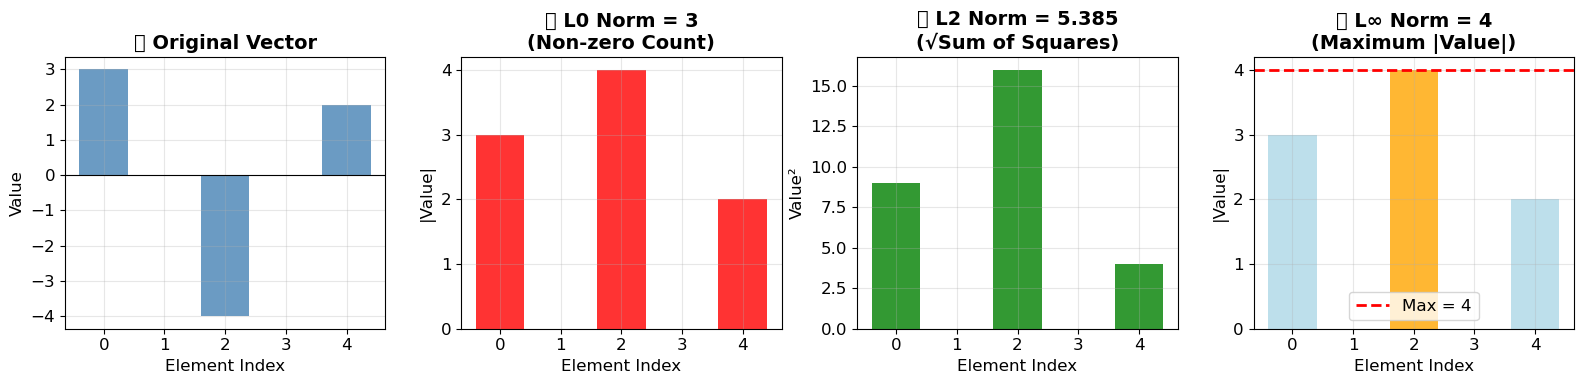

In [52]:
def compute_norms(vector):
    """
    Compute L0, L2, and L∞ norms of a vector.
    """
    # L0 norm: count of non-zero elements
    l0_norm = np.sum(vector != 0)
    
    # L2 norm: Euclidean norm (root of sum of squares)
    l2_norm = np.sqrt(np.sum(vector**2))
    
    # L∞ norm: maximum absolute value
    linf_norm = np.max(np.abs(vector))
    
    return l0_norm, l2_norm, linf_norm

# Example with a simple vector
example_vector = np.array([3, 0, -4, 0, 2])
l0, l2, linf = compute_norms(example_vector)

print("🔢 Example Vector:", example_vector)
print("\n📊 Norm Calculations:")
print(f"   L0 norm:  {l0}     (non-zero elements: 3, -4, 2)")
print(f"   L2 norm:  {l2:.3f} (√(3² + 0² + (-4)² + 0² + 2²) = √(9 + 16 + 4))")
print(f"   L∞ norm:  {linf}    (max absolute value: |-4| = 4)")

# Visual representation
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Original vector
axes[0].bar(range(len(example_vector)), example_vector, color='steelblue', alpha=0.8)
axes[0].set_title('📊 Original Vector', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Element Index')
axes[0].set_ylabel('Value')
axes[0].axhline(y=0, color='black', linewidth=0.8)
axes[0].grid(True, alpha=0.3)

# L0 norm visualization
l0_colors = ['red' if x != 0 else 'lightgray' for x in example_vector]
axes[1].bar(range(len(example_vector)), np.abs(example_vector), color=l0_colors, alpha=0.8)
axes[1].set_title(f'🔢 L0 Norm = {l0}\n(Non-zero Count)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Element Index')
axes[1].set_ylabel('|Value|')
axes[1].grid(True, alpha=0.3)

# L2 norm visualization  
squared_values = example_vector**2
axes[2].bar(range(len(example_vector)), squared_values, color='green', alpha=0.8)
axes[2].set_title(f'📏 L2 Norm = {l2:.3f}\n(√Sum of Squares)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Element Index')
axes[2].set_ylabel('Value²')
axes[2].grid(True, alpha=0.3)

# L∞ norm visualization
linf_colors = ['orange' if abs(x) == linf else 'lightblue' for x in example_vector]
axes[3].bar(range(len(example_vector)), np.abs(example_vector), color=linf_colors, alpha=0.8)
axes[3].set_title(f'🎯 L∞ Norm = {linf}\n(Maximum |Value|)', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Element Index')
axes[3].set_ylabel('|Value|')
axes[3].axhline(y=linf, color='red', linestyle='--', linewidth=2, label=f'Max = {linf}')
axes[3].legend()
axes[3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🎨 Part 2: Geometric Visualization - Unit Balls

Let's visualize what the "unit balls" look like for each norm in 2D space. The unit ball shows all points that are at distance ≤ 1 from the origin.

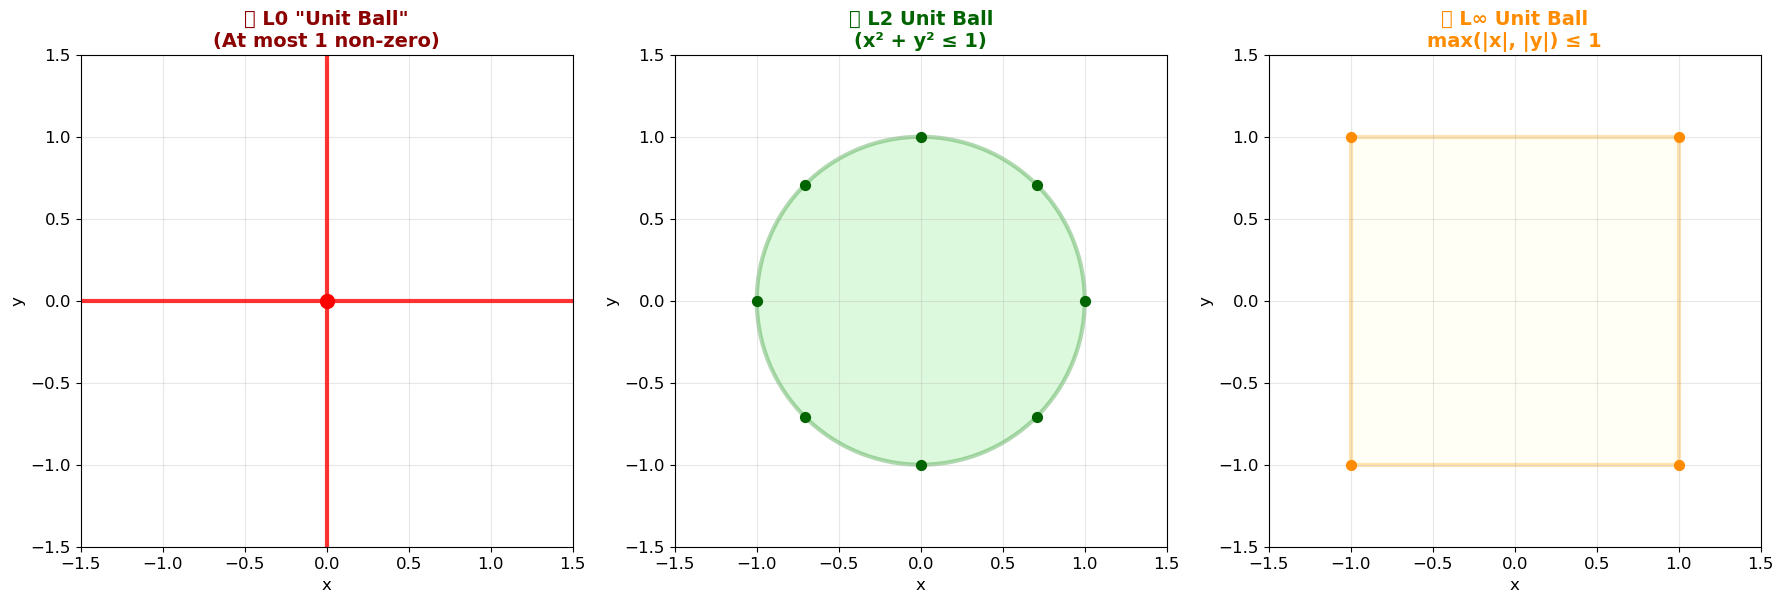

🎨 Key Insights:
   🔢 L0: Favors sparse changes (few non-zero elements)
   📏 L2: Creates smooth, circular constraints (natural distance)
   🎯 L∞: Enforces uniform bounds (no single element too large)


In [53]:
def plot_unit_balls():
    """
    Plot unit balls for L0, L2, and L∞ norms in 2D.
    """
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # Create coordinate grids
    x = np.linspace(-1.5, 1.5, 300)
    y = np.linspace(-1.5, 1.5, 300)
    X, Y = np.meshgrid(x, y)
    
    # L0 "norm" (actually not a proper norm, but useful for sparsity)
    # Points with at most 1 non-zero coordinate
    axes[0].axhline(0, color='red', linewidth=3, alpha=0.8, label='x-axis (y=0)')
    axes[0].axvline(0, color='red', linewidth=3, alpha=0.8, label='y-axis (x=0)')
    axes[0].scatter([0], [0], color='red', s=100, zorder=5, label='Origin')
    axes[0].set_xlim(-1.5, 1.5)
    axes[0].set_ylim(-1.5, 1.5)
    axes[0].set_title('🔢 L0 "Unit Ball"\n(At most 1 non-zero)', fontsize=14, fontweight='bold', color='darkred')
    axes[0].set_xlabel('x')
    axes[0].set_ylabel('y')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_aspect('equal')
    
    # L2 norm (circle)
    circle = patches.Circle((0, 0), 1, linewidth=3, edgecolor='green', facecolor='lightgreen', alpha=0.3)
    axes[1].add_patch(circle)
    
    # Add some example points
    theta = np.linspace(0, 2*np.pi, 8, endpoint=False)
    circle_x = np.cos(theta)
    circle_y = np.sin(theta)
    axes[1].scatter(circle_x, circle_y, color='darkgreen', s=50, zorder=5)
    
    axes[1].set_xlim(-1.5, 1.5)
    axes[1].set_ylim(-1.5, 1.5)
    axes[1].set_title('📏 L2 Unit Ball\n(x² + y² ≤ 1)', fontsize=14, fontweight='bold', color='darkgreen')
    axes[1].set_xlabel('x')
    axes[1].set_ylabel('y')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_aspect('equal')
    
    # L∞ norm (square)
    square = patches.Rectangle((-1, -1), 2, 2, linewidth=3, edgecolor='orange', facecolor='lightyellow', alpha=0.3)
    axes[2].add_patch(square)
    
    # Add corner points
    corners = [(-1, -1), (-1, 1), (1, -1), (1, 1)]
    for corner in corners:
        axes[2].scatter(corner[0], corner[1], color='darkorange', s=50, zorder=5)
    
    axes[2].set_xlim(-1.5, 1.5)
    axes[2].set_ylim(-1.5, 1.5)
    axes[2].set_title('🎯 L∞ Unit Ball\nmax(|x|, |y|) ≤ 1', fontsize=14, fontweight='bold', color='darkorange')
    axes[2].set_xlabel('x')
    axes[2].set_ylabel('y')
    axes[2].grid(True, alpha=0.3)
    axes[2].set_aspect('equal')
    
    plt.tight_layout()
    plt.show()
    
    print("🎨 Key Insights:")
    print("   🔢 L0: Favors sparse changes (few non-zero elements)")
    print("   📏 L2: Creates smooth, circular constraints (natural distance)")
    print("   🎯 L∞: Enforces uniform bounds (no single element too large)")

plot_unit_balls()

## 🖼️ Part 3: Image Perturbations - Real Examples

Now let's see how different norms affect actual images!

📸 Loaded image with shape: (64, 64)
📊 Pixel value range: [0.015, 0.919]


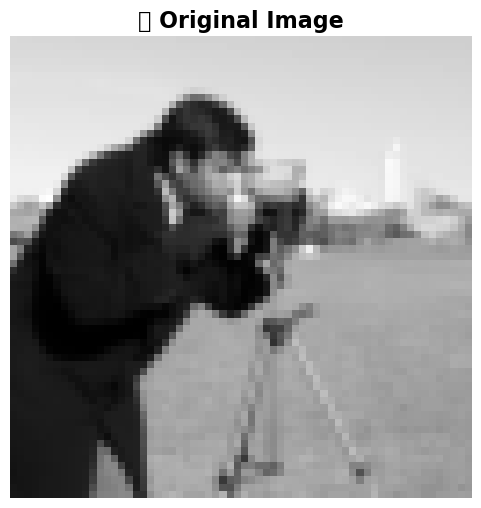

In [54]:
# Load a sample image
def load_sample_image():
    """
    Load and preprocess a sample image for demonstrations.
    """
    # Use scikit-image's built-in camera image
    img = data.camera()  # Grayscale camera image
    
    # Resize to manageable size
    from skimage.transform import resize
    img_resized = resize(img, (64, 64), anti_aliasing=True)
    
    # Normalize to [0, 1]
    img_normalized = img_resized / 255.0 if img_resized.max() > 1 else img_resized
    
    return img_normalized

# Load the image
original_image = load_sample_image()
print(f"📸 Loaded image with shape: {original_image.shape}")
print(f"📊 Pixel value range: [{original_image.min():.3f}, {original_image.max():.3f}]")

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(original_image, cmap='gray')
plt.title('📷 Original Image', fontsize=16, fontweight='bold')
plt.axis('off')
plt.show()

In [55]:
def create_norm_constrained_perturbations(image, epsilon_values):
    """
    Create perturbations constrained by different norms.
    """
    h, w = image.shape
    results = {}
    
    for eps in epsilon_values:
        # L0 constrained perturbation (sparse)
        l0_pert = np.zeros_like(image)
        # Randomly select pixels to modify (sparse pattern)
        num_pixels_to_change = int(eps * h * w)  # eps as fraction of total pixels
        if num_pixels_to_change > 0:
            flat_indices = np.random.choice(h * w, size=num_pixels_to_change, replace=False)
            row_indices = flat_indices // w
            col_indices = flat_indices % w
            # Add random perturbation values
            l0_pert[row_indices, col_indices] = np.random.uniform(-0.3, 0.3, size=num_pixels_to_change)
        
        # L2 constrained perturbation (smooth, energy-based)
        l2_pert = np.random.normal(0, 0.1, image.shape)
        l2_norm = np.sqrt(np.sum(l2_pert**2))
        if l2_norm > eps:
            l2_pert = l2_pert * (eps / l2_norm)  # Scale to satisfy L2 constraint
        
        # L∞ constrained perturbation (uniform bound)
        linf_pert = np.random.uniform(-eps, eps, image.shape)
        
        # Create perturbed images
        l0_image = np.clip(image + l0_pert, 0, 1)
        l2_image = np.clip(image + l2_pert, 0, 1)
        linf_image = np.clip(image + linf_pert, 0, 1)
        
        results[eps] = {
            'l0_pert': l0_pert,
            'l2_pert': l2_pert,
            'linf_pert': linf_pert,
            'l0_image': l0_image,
            'l2_image': l2_image,
            'linf_image': linf_image
        }
    
    return results

# Generate perturbations with different strength levels
np.random.seed(42)  # For reproducibility
epsilon_values = [0.01, 0.05, 0.1]
perturbation_results = create_norm_constrained_perturbations(original_image, epsilon_values)

print("🎨 Generated perturbations for epsilon values:", epsilon_values)

🎨 Generated perturbations for epsilon values: [0.01, 0.05, 0.1]


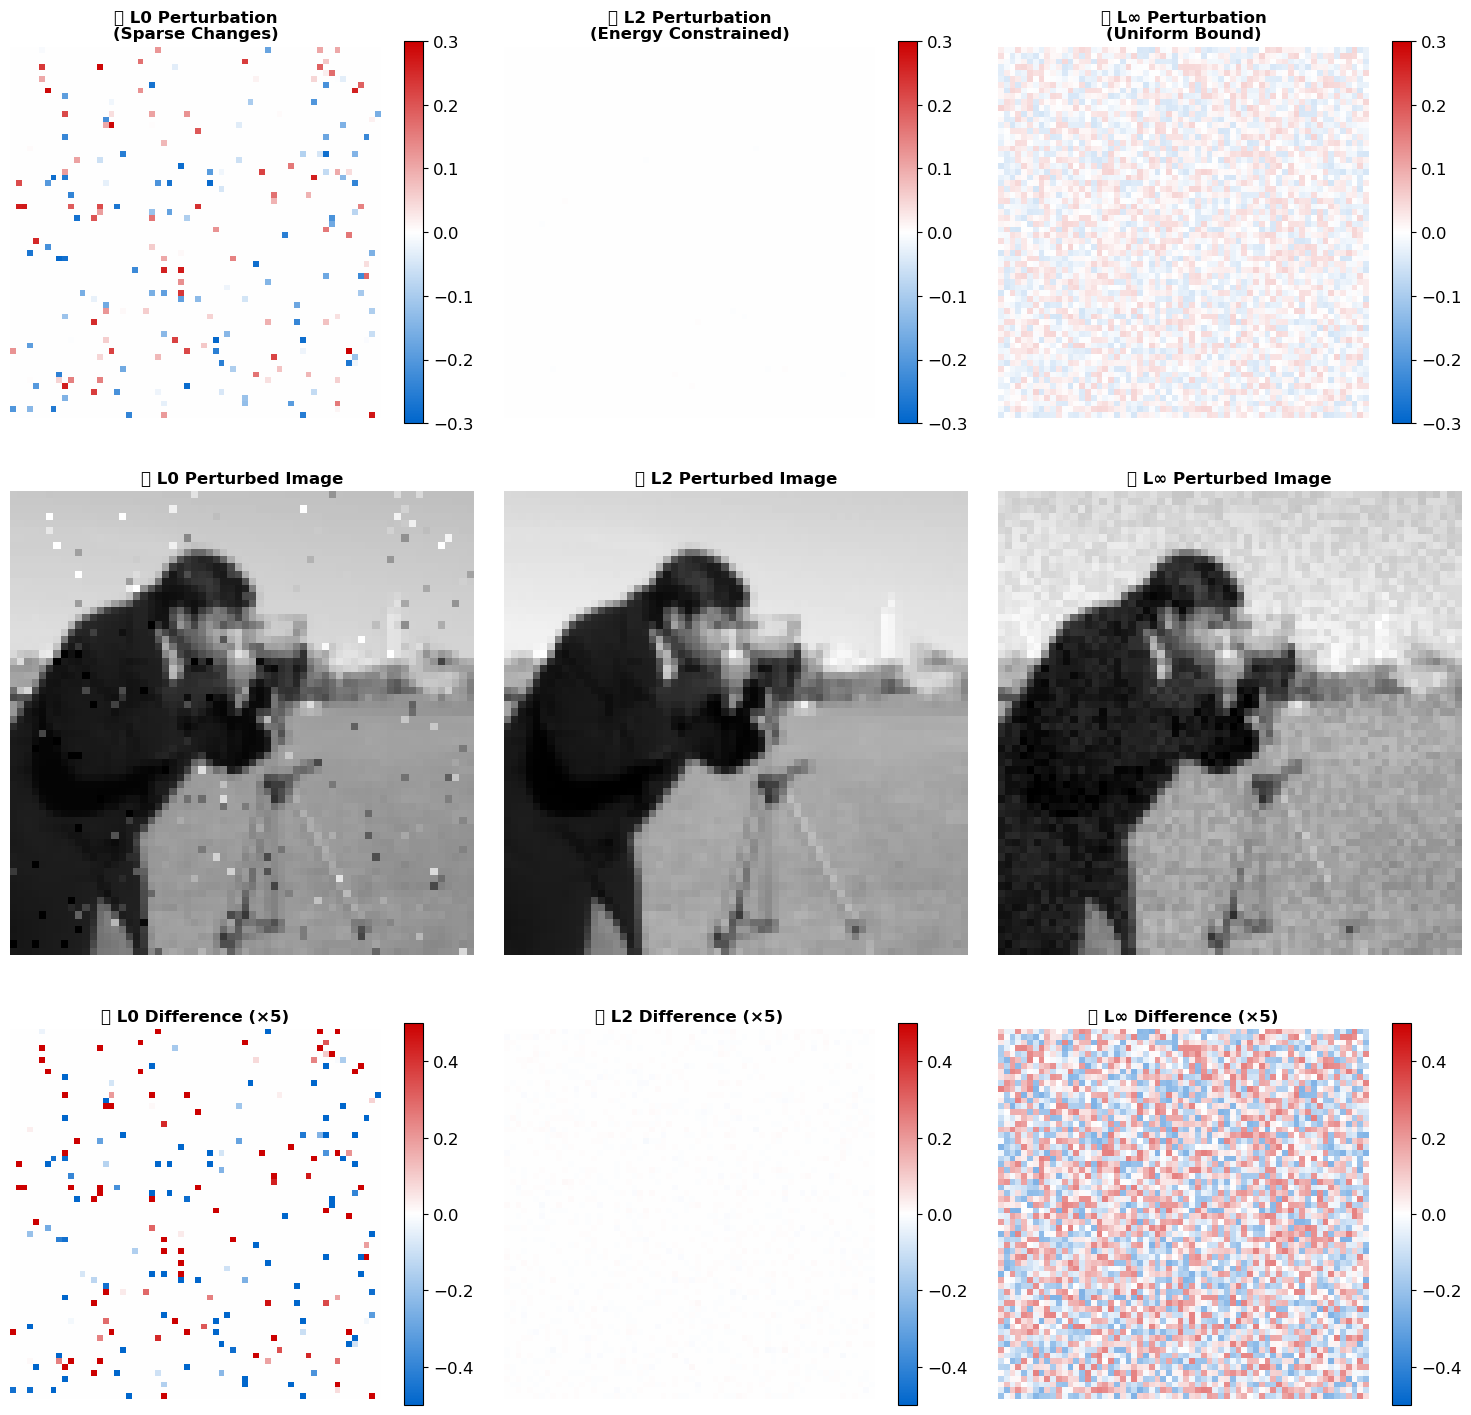


📊 Perturbation Statistics (ε = 0.05):

🔢 L0 Perturbation:
   L0 norm: 204 pixels changed
   L2 norm: 2.4698
   L∞ norm: 0.2997

📏 L2 Perturbation:
   L0 norm: 4096 pixels changed
   L2 norm: 0.0500
   L∞ norm: 0.0032

🎯 L∞ Perturbation:
   L0 norm: 4096 pixels changed
   L2 norm: 1.8508
   L∞ norm: 0.0500


In [56]:
def visualize_perturbations(image, results, eps_to_show=0.05):
    """
    Visualize different types of perturbations.
    """
    if eps_to_show not in results:
        eps_to_show = list(results.keys())[1]  # Use middle value
    
    data = results[eps_to_show]
    
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    
    # Row 1: Perturbations
    # L0 perturbation
    im1 = axes[0, 0].imshow(data['l0_pert'], cmap=cmap_perturbation, vmin=-0.3, vmax=0.3)
    axes[0, 0].set_title('🔢 L0 Perturbation\n(Sparse Changes)', fontsize=12, fontweight='bold')
    axes[0, 0].axis('off')
    plt.colorbar(im1, ax=axes[0, 0], shrink=0.8)
    
    # L2 perturbation
    im2 = axes[0, 1].imshow(data['l2_pert'], cmap=cmap_perturbation, vmin=-0.3, vmax=0.3)
    axes[0, 1].set_title('📏 L2 Perturbation\n(Energy Constrained)', fontsize=12, fontweight='bold')
    axes[0, 1].axis('off')
    plt.colorbar(im2, ax=axes[0, 1], shrink=0.8)
    
    # L∞ perturbation
    im3 = axes[0, 2].imshow(data['linf_pert'], cmap=cmap_perturbation, vmin=-0.3, vmax=0.3)
    axes[0, 2].set_title('🎯 L∞ Perturbation\n(Uniform Bound)', fontsize=12, fontweight='bold')
    axes[0, 2].axis('off')
    plt.colorbar(im3, ax=axes[0, 2], shrink=0.8)
    
    # Row 2: Perturbed images
    axes[1, 0].imshow(data['l0_image'], cmap='gray')
    axes[1, 0].set_title('📸 L0 Perturbed Image', fontsize=12, fontweight='bold')
    axes[1, 0].axis('off')
    
    axes[1, 1].imshow(data['l2_image'], cmap='gray')
    axes[1, 1].set_title('📸 L2 Perturbed Image', fontsize=12, fontweight='bold')
    axes[1, 1].axis('off')
    
    axes[1, 2].imshow(data['linf_image'], cmap='gray')
    axes[1, 2].set_title('📸 L∞ Perturbed Image', fontsize=12, fontweight='bold')
    axes[1, 2].axis('off')
    
    # Row 3: Difference images (amplified for visibility)
    diff_l0 = data['l0_image'] - image
    diff_l2 = data['l2_image'] - image
    diff_linf = data['linf_image'] - image
    
    im4 = axes[2, 0].imshow(diff_l0 * 5, cmap=cmap_perturbation, vmin=-0.5, vmax=0.5)
    axes[2, 0].set_title('🔍 L0 Difference (×5)', fontsize=12, fontweight='bold')
    axes[2, 0].axis('off')
    plt.colorbar(im4, ax=axes[2, 0], shrink=0.8)
    
    im5 = axes[2, 1].imshow(diff_l2 * 5, cmap=cmap_perturbation, vmin=-0.5, vmax=0.5)
    axes[2, 1].set_title('🔍 L2 Difference (×5)', fontsize=12, fontweight='bold')
    axes[2, 1].axis('off')
    plt.colorbar(im5, ax=axes[2, 1], shrink=0.8)
    
    im6 = axes[2, 2].imshow(diff_linf * 5, cmap=cmap_perturbation, vmin=-0.5, vmax=0.5)
    axes[2, 2].set_title('🔍 L∞ Difference (×5)', fontsize=12, fontweight='bold')
    axes[2, 2].axis('off')
    plt.colorbar(im6, ax=axes[2, 2], shrink=0.8)
    
    plt.tight_layout()
    plt.show()
    
    # Print norm values
    print(f"\n📊 Perturbation Statistics (ε = {eps_to_show}):")
    print("\n🔢 L0 Perturbation:")
    l0_norm = np.sum(data['l0_pert'] != 0)
    l2_of_l0 = np.sqrt(np.sum(data['l0_pert']**2))
    linf_of_l0 = np.max(np.abs(data['l0_pert']))
    print(f"   L0 norm: {l0_norm} pixels changed")
    print(f"   L2 norm: {l2_of_l0:.4f}")
    print(f"   L∞ norm: {linf_of_l0:.4f}")
    
    print("\n📏 L2 Perturbation:")
    l0_of_l2 = np.sum(data['l2_pert'] != 0)
    l2_norm = np.sqrt(np.sum(data['l2_pert']**2))
    linf_of_l2 = np.max(np.abs(data['l2_pert']))
    print(f"   L0 norm: {l0_of_l2} pixels changed")
    print(f"   L2 norm: {l2_norm:.4f}")
    print(f"   L∞ norm: {linf_of_l2:.4f}")
    
    print("\n🎯 L∞ Perturbation:")
    l0_of_linf = np.sum(data['linf_pert'] != 0)
    l2_of_linf = np.sqrt(np.sum(data['linf_pert']**2))
    linf_norm = np.max(np.abs(data['linf_pert']))
    print(f"   L0 norm: {l0_of_linf} pixels changed")
    print(f"   L2 norm: {l2_of_linf:.4f}")
    print(f"   L∞ norm: {linf_norm:.4f}")

visualize_perturbations(original_image, perturbation_results, eps_to_show=0.05)

## 🎮 Part 4: Interactive Exploration

Now let's create an interactive widget to explore how different epsilon values affect perturbations!

In [57]:
def interactive_norm_demo(epsilon=0.05, norm_type='L∞', seed=42):
    """
    Interactive demonstration of different norm-constrained perturbations.
    """
    np.random.seed(seed)
    
    h, w = original_image.shape
    
    if norm_type == 'L0':
        # L0: sparse perturbation
        perturbation = np.zeros_like(original_image)
        num_pixels_to_change = int(epsilon * h * w)
        if num_pixels_to_change > 0:
            flat_indices = np.random.choice(h * w, size=num_pixels_to_change, replace=False)
            row_indices = flat_indices // w
            col_indices = flat_indices % w
            perturbation[row_indices, col_indices] = np.random.uniform(-0.3, 0.3, size=num_pixels_to_change)
        
        actual_l0 = np.sum(perturbation != 0)
        actual_l2 = np.sqrt(np.sum(perturbation**2))
        actual_linf = np.max(np.abs(perturbation))
        
    elif norm_type == 'L2':
        # L2: energy-constrained perturbation
        perturbation = np.random.normal(0, 0.1, original_image.shape)
        l2_norm = np.sqrt(np.sum(perturbation**2))
        if l2_norm > epsilon:
            perturbation = perturbation * (epsilon / l2_norm)
        
        actual_l0 = np.sum(perturbation != 0)
        actual_l2 = np.sqrt(np.sum(perturbation**2))
        actual_linf = np.max(np.abs(perturbation))
        
    else:  # L∞
        # L∞: uniform bound perturbation
        perturbation = np.random.uniform(-epsilon, epsilon, original_image.shape)
        
        actual_l0 = np.sum(perturbation != 0)
        actual_l2 = np.sqrt(np.sum(perturbation**2))
        actual_linf = np.max(np.abs(perturbation))
    
    # Create perturbed image
    perturbed_image = np.clip(original_image + perturbation, 0, 1)
    
    # Visualization
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    # Original image
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title('📷 Original Image', fontsize=14, fontweight='bold')
    axes[0].axis('off')
    
    # Perturbation
    im1 = axes[1].imshow(perturbation, cmap=cmap_perturbation, vmin=-0.3, vmax=0.3)
    axes[1].set_title(f'🎨 {norm_type} Perturbation\n(ε = {epsilon})', fontsize=14, fontweight='bold')
    axes[1].axis('off')
    plt.colorbar(im1, ax=axes[1], shrink=0.8)
    
    # Perturbed image
    axes[2].imshow(perturbed_image, cmap='gray')
    axes[2].set_title('📸 Perturbed Image', fontsize=14, fontweight='bold')
    axes[2].axis('off')
    
    # Difference (amplified)
    difference = perturbed_image - original_image
    im2 = axes[3].imshow(difference * 10, cmap=cmap_perturbation, vmin=-1, vmax=1)
    axes[3].set_title('🔍 Difference (×10)', fontsize=14, fontweight='bold')
    axes[3].axis('off')
    plt.colorbar(im2, ax=axes[3], shrink=0.8)
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n📊 Perturbation Statistics for {norm_type} with ε = {epsilon}:")
    print(f"   🔢 L0 norm (pixels changed): {actual_l0}")
    print(f"   📏 L2 norm (energy): {actual_l2:.6f}")
    print(f"   🎯 L∞ norm (max change): {actual_linf:.6f}")
    
    sparsity = (1 - actual_l0 / (h * w)) * 100
    print(f"   ✨ Sparsity: {sparsity:.2f}% (pixels unchanged)")

# Create interactive widget
interactive_widget = interact(
    interactive_norm_demo,
    epsilon=FloatSlider(min=0.001, max=0.2, step=0.005, value=0.05, description='Epsilon (ε)'),
    norm_type=Dropdown(options=['L0', 'L2', 'L∞'], value='L∞', description='Norm Type'),
    seed=IntSlider(min=1, max=100, step=1, value=42, description='Random Seed')
)

print("\n🎮 Use the sliders above to explore different norms and epsilon values!")
print("💡 Try changing the norm type and epsilon to see how perturbations differ.")

interactive(children=(FloatSlider(value=0.05, description='Epsilon (ε)', max=0.2, min=0.001, step=0.005), Drop…


🎮 Use the sliders above to explore different norms and epsilon values!
💡 Try changing the norm type and epsilon to see how perturbations differ.


## 📈 Part 5: Norm Comparison Analysis

Let's analyze how the three norms relate to each other mathematically.

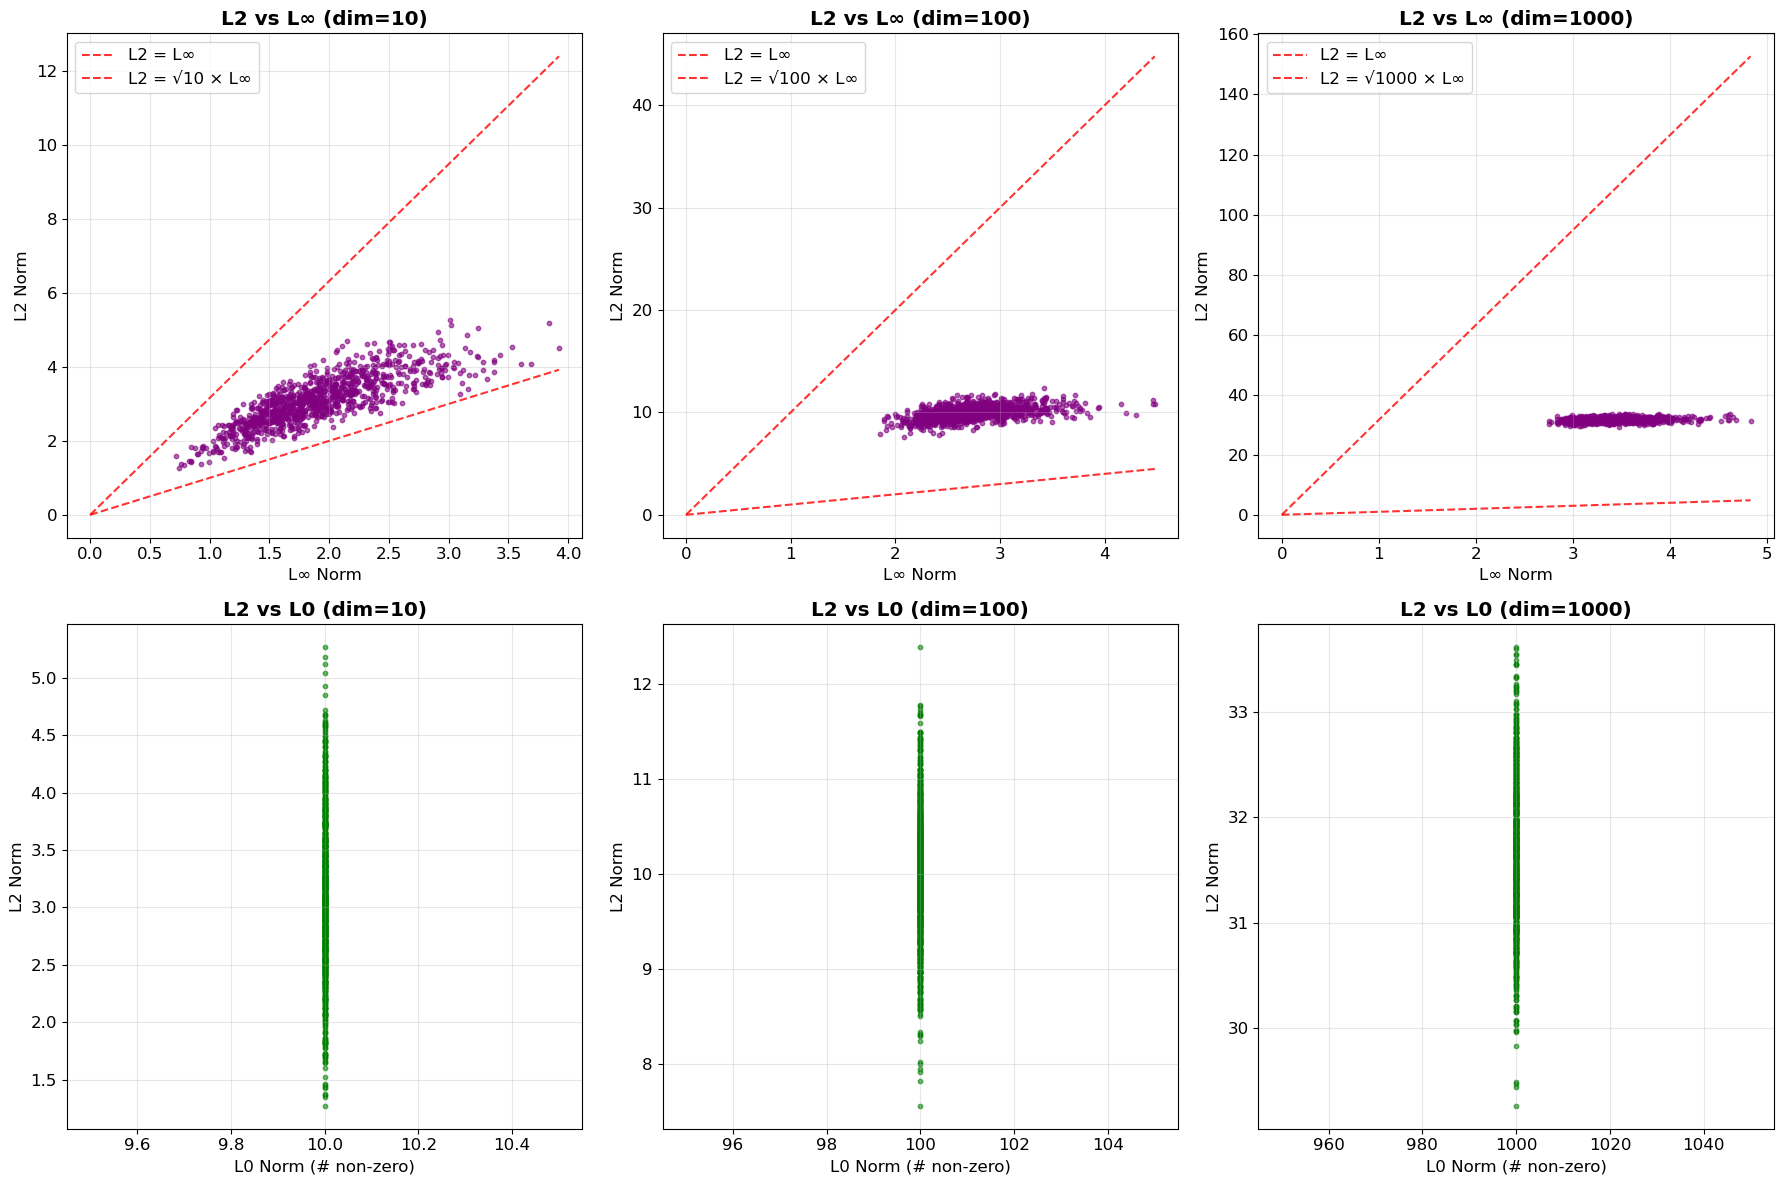

📐 Mathematical Relationships:

🔗 Key Inequalities (for vectors in ℝᵈ):
   • L∞(x) ≤ L2(x) ≤ √d × L∞(x)
   • L2(x) ≤ √L0(x) × L∞(x)
   • L∞(x) ≤ L1(x) ≤ d × L∞(x)

💡 Practical Implications:
   🎯 L∞: Best for uniform constraints (no pixel changes too much)
   📏 L2: Best for energy/power constraints (natural for optimization)
   🔢 L0: Best for sparse changes (few pixels modified)


In [58]:
def analyze_norm_relationships():
    """
    Analyze mathematical relationships between different norms.
    """
    # Generate random vectors of different dimensions
    dimensions = [10, 100, 1000]
    n_samples = 1000
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    for i, dim in enumerate(dimensions):
        # Generate random vectors
        vectors = np.random.randn(n_samples, dim)
        
        # Compute norms
        l0_norms = np.array([np.sum(v != 0) for v in vectors])
        l2_norms = np.array([np.sqrt(np.sum(v**2)) for v in vectors])
        linf_norms = np.array([np.max(np.abs(v)) for v in vectors])
        
        # L2 vs L∞
        axes[0, i].scatter(linf_norms, l2_norms, alpha=0.6, s=10, color='purple')
        axes[0, i].set_xlabel('L∞ Norm')
        axes[0, i].set_ylabel('L2 Norm')
        axes[0, i].set_title(f'L2 vs L∞ (dim={dim})', fontweight='bold')
        axes[0, i].grid(True, alpha=0.3)
        
        # Add theoretical bounds
        x_max = linf_norms.max()
        x_range = np.linspace(0, x_max, 100)
        # L∞ ≤ L2 ≤ √d * L∞
        axes[0, i].plot(x_range, x_range, 'r--', alpha=0.8, label='L2 = L∞')
        axes[0, i].plot(x_range, np.sqrt(dim) * x_range, 'r--', alpha=0.8, label=f'L2 = √{dim} × L∞')
        axes[0, i].legend()
        
        # L0 vs L2
        axes[1, i].scatter(l0_norms, l2_norms, alpha=0.6, s=10, color='green')
        axes[1, i].set_xlabel('L0 Norm (# non-zero)')
        axes[1, i].set_ylabel('L2 Norm')
        axes[1, i].set_title(f'L2 vs L0 (dim={dim})', fontweight='bold')
        axes[1, i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("📐 Mathematical Relationships:")
    print("\n🔗 Key Inequalities (for vectors in ℝᵈ):")
    print("   • L∞(x) ≤ L2(x) ≤ √d × L∞(x)")
    print("   • L2(x) ≤ √L0(x) × L∞(x)")
    print("   • L∞(x) ≤ L1(x) ≤ d × L∞(x)")
    
    print("\n💡 Practical Implications:")
    print("   🎯 L∞: Best for uniform constraints (no pixel changes too much)")
    print("   📏 L2: Best for energy/power constraints (natural for optimization)")
    print("   🔢 L0: Best for sparse changes (few pixels modified)")

analyze_norm_relationships()

## 🔒 Part 6: Applications in Adversarial Machine Learning

Let's see how these norms are used in real adversarial attacks and defenses!

In [59]:
def demonstrate_adversarial_context():
    """
    Show how norms are used in adversarial ML context.
    """
    print("🔒 NORMS IN ADVERSARIAL MACHINE LEARNING")
    print("=" * 60)
    
    attack_examples = {
        "🎯 L∞ Attacks (Most Common)": {
            "examples": ["PGD", "FGSM", "BIM/I-FGSM"],
            "constraint": "||δ||∞ ≤ ε",
            "meaning": "No pixel changes by more than ε",
            "typical_ε": "0.03 - 0.1 (for images in [0,1])",
            "pros": "Easy to understand, perceptually reasonable",
            "cons": "May create visible artifacts at boundaries"
        },
        "📏 L2 Attacks (Energy Based)": {
            "examples": ["C&W", "DeepFool", "PGD-L2"],
            "constraint": "||δ||₂ ≤ ε",
            "meaning": "Total perturbation energy ≤ ε²",
            "typical_ε": "0.5 - 3.0 (for images in [0,1])",
            "pros": "Smooth perturbations, good for optimization",
            "cons": "Less intuitive bound, can concentrate changes"
        },
        "🔢 L0 Attacks (Sparse)": {
            "examples": ["SparseFool", "PointWise", "JSMA"],
            "constraint": "||δ||₀ ≤ k",
            "meaning": "Change at most k pixels",
            "typical_ε": "1% - 10% of total pixels",
            "pros": "Very few pixels changed, hard to detect",
            "cons": "Optimization is difficult (non-convex)"
        }
    }
    
    for attack_type, details in attack_examples.items():
        print(f"\n{attack_type}:")
        print(f"   📚 Examples: {', '.join(details['examples'])}")
        print(f"   ⚖️ Constraint: {details['constraint']}")
        print(f"   💭 Meaning: {details['meaning']}")
        print(f"   📊 Typical ε: {details['typical_ε']}")
        print(f"   ✅ Pros: {details['pros']}")
        print(f"   ❌ Cons: {details['cons']}")
    
    print("\n" + "=" * 60)
    print("🛡️ DEFENSE APPLICATIONS")
    print("=" * 60)
    
    defense_examples = {
        "🏃 Adversarial Training": "Train with L∞/L2 bounded perturbations",
        "🔍 Input Detection": "Detect inputs with unusual norm properties",
        "🎨 Input Preprocessing": "Apply transformations that affect different norms",
        "📈 Certified Defenses": "Prove robustness within norm balls",
        "🔄 Randomized Smoothing": "Use L2 balls for provable robustness"
    }
    
    for defense_type, description in defense_examples.items():
        print(f"   {defense_type}: {description}")
    
    print("\n" + "=" * 60)
    print("🎯 CHOOSING THE RIGHT NORM")
    print("=" * 60)
    
    print("\n🤔 Consider Your Threat Model:")
    print("   • 🖼️ Image quality preservation → L∞")
    print("   • ⚡ Energy/power constraints → L2")
    print("   • 🕵️ Stealth (few changes) → L0")
    print("   • 🔧 Optimization ease → L2")
    print("   • 👁️ Human perception → L∞ or perceptual metrics")
    
    print("\n💡 Pro Tips:")
    print("   • Test robustness against ALL norm types")
    print("   • Different norms reveal different vulnerabilities")
    print("   • Combine multiple constraints for stronger defenses")
    print("   • Consider perceptual metrics beyond mathematical norms")

demonstrate_adversarial_context()

🔒 NORMS IN ADVERSARIAL MACHINE LEARNING

🎯 L∞ Attacks (Most Common):
   📚 Examples: PGD, FGSM, BIM/I-FGSM
   ⚖️ Constraint: ||δ||∞ ≤ ε
   💭 Meaning: No pixel changes by more than ε
   📊 Typical ε: 0.03 - 0.1 (for images in [0,1])
   ✅ Pros: Easy to understand, perceptually reasonable
   ❌ Cons: May create visible artifacts at boundaries

📏 L2 Attacks (Energy Based):
   📚 Examples: C&W, DeepFool, PGD-L2
   ⚖️ Constraint: ||δ||₂ ≤ ε
   💭 Meaning: Total perturbation energy ≤ ε²
   📊 Typical ε: 0.5 - 3.0 (for images in [0,1])
   ✅ Pros: Smooth perturbations, good for optimization
   ❌ Cons: Less intuitive bound, can concentrate changes

🔢 L0 Attacks (Sparse):
   📚 Examples: SparseFool, PointWise, JSMA
   ⚖️ Constraint: ||δ||₀ ≤ k
   💭 Meaning: Change at most k pixels
   📊 Typical ε: 1% - 10% of total pixels
   ✅ Pros: Very few pixels changed, hard to detect
   ❌ Cons: Optimization is difficult (non-convex)

🛡️ DEFENSE APPLICATIONS
   🏃 Adversarial Training: Train with L∞/L2 bounded perturb

## 🥊 Part 6A: Adversarial Attack Simulation - Detailed Comparison

Let's simulate actual adversarial attacks using different norms and compare their effectiveness!

## 🎨 Part 7: Advanced Visualization - 3D Norm Balls

Let's create beautiful 3D visualizations of how norm balls look in higher dimensions!

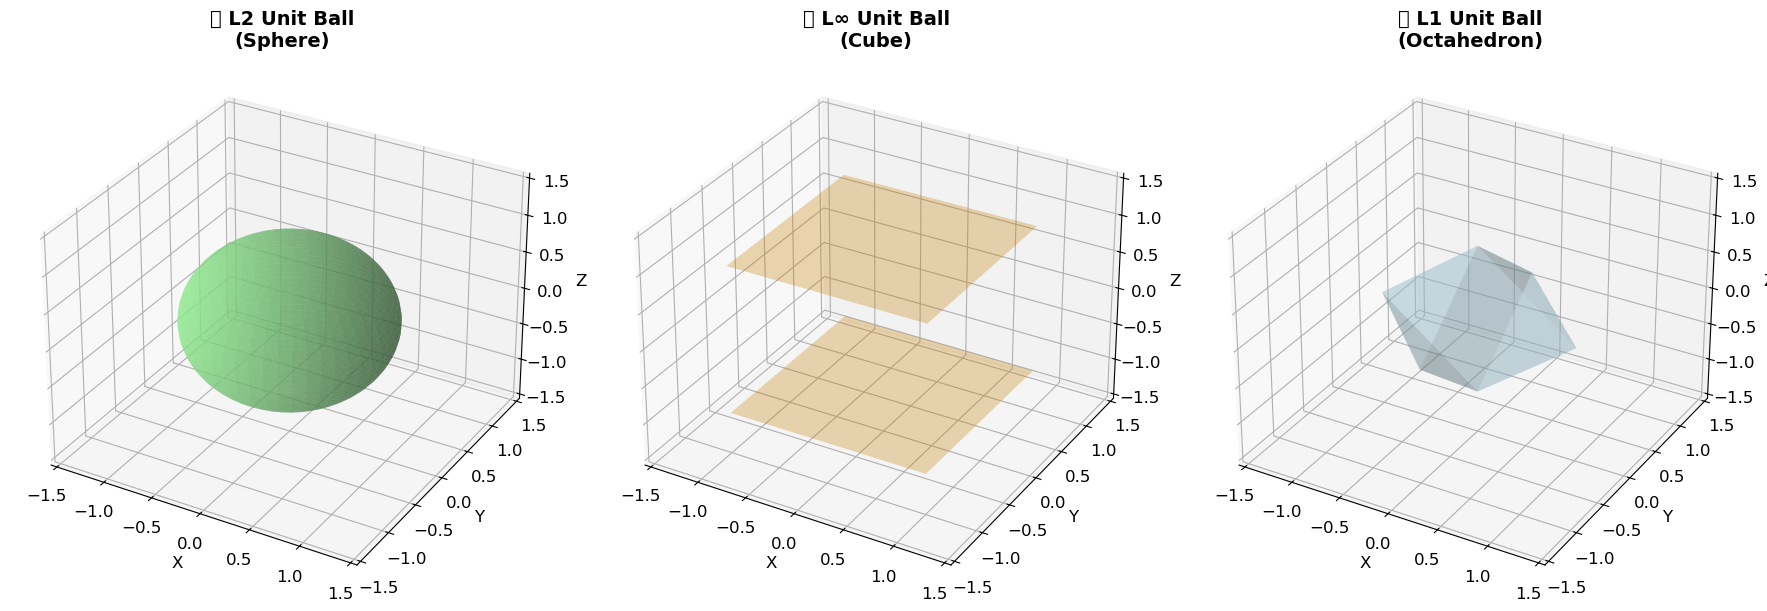

🎨 3D Norm Balls Insights:
   📏 L2 (Sphere): Smooth, all directions equally constrained
   🎯 L∞ (Cube): Sharp corners, axis-aligned constraints
   📐 L1 (Octahedron): Promotes sparsity, diamond-shaped

💡 As dimension increases, these shapes become more different!


In [60]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_norm_balls():
    """
    Plot 3D visualizations of norm balls.
    """
    fig = plt.figure(figsize=(18, 6))
    
    # L2 ball (sphere)
    ax1 = fig.add_subplot(131, projection='3d')
    
    # Create sphere
    u = np.linspace(0, 2 * np.pi, 50)
    v = np.linspace(0, np.pi, 50)
    x_sphere = np.outer(np.cos(u), np.sin(v))
    y_sphere = np.outer(np.sin(u), np.sin(v))
    z_sphere = np.outer(np.ones(np.size(u)), np.cos(v))
    
    ax1.plot_surface(x_sphere, y_sphere, z_sphere, alpha=0.6, color='lightgreen')
    ax1.set_title('📏 L2 Unit Ball\n(Sphere)', fontsize=14, fontweight='bold')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    
    # L∞ ball (cube)
    ax2 = fig.add_subplot(132, projection='3d')
    
    # Create cube vertices
    r = [-1, 1]
    X, Y = np.meshgrid(r, r)
    
    # Draw cube faces
    for z in r:
        Z = z * np.ones_like(X)
        ax2.plot_surface(X, Y, Z, alpha=0.3, color='orange')
    
    for x in r:
        X_face = x * np.ones_like(Y)
        Z_face = np.meshgrid(r, r)[1]
        ax2.plot_surface(X_face, Y, Z_face, alpha=0.3, color='orange')
    
    for y in r:
        Y_face = y * np.ones_like(X)
        Z_face = np.meshgrid(r, r)[0]
        ax2.plot_surface(X, Y_face, Z_face, alpha=0.3, color='orange')
    
    ax2.set_title('🎯 L∞ Unit Ball\n(Cube)', fontsize=14, fontweight='bold')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    
    # L1 ball (octahedron) for comparison
    ax3 = fig.add_subplot(133, projection='3d')
    
    # Create octahedron
    vertices = np.array([
        [1, 0, 0], [-1, 0, 0], [0, 1, 0], [0, -1, 0], [0, 0, 1], [0, 0, -1]
    ])
    
    # Define faces of octahedron
    faces = [
        [0, 2, 4], [0, 4, 3], [0, 3, 5], [0, 5, 2],  # faces connected to [1,0,0]
        [1, 4, 2], [1, 3, 4], [1, 5, 3], [1, 2, 5]   # faces connected to [-1,0,0]
    ]
    
    for face in faces:
        triangle = vertices[face]
        ax3.plot_trisurf(triangle[:, 0], triangle[:, 1], triangle[:, 2], alpha=0.3, color='lightblue')
    
    ax3.set_title('📐 L1 Unit Ball\n(Octahedron)', fontsize=14, fontweight='bold')
    ax3.set_xlabel('X')
    ax3.set_ylabel('Y')
    ax3.set_zlabel('Z')
    
    # Set equal aspect ratio for all subplots
    for ax in [ax1, ax2, ax3]:
        ax.set_xlim([-1.5, 1.5])
        ax.set_ylim([-1.5, 1.5])
        ax.set_zlim([-1.5, 1.5])
    
    plt.tight_layout()
    plt.show()
    
    print("🎨 3D Norm Balls Insights:")
    print("   📏 L2 (Sphere): Smooth, all directions equally constrained")
    print("   🎯 L∞ (Cube): Sharp corners, axis-aligned constraints")
    print("   📐 L1 (Octahedron): Promotes sparsity, diamond-shaped")
    print("\n💡 As dimension increases, these shapes become more different!")

plot_3d_norm_balls()

## 🎓 Part 8: Quiz and Summary

Let's test your understanding with an interactive quiz!

In [61]:
def interactive_quiz():
    """
    Interactive quiz about norms.
    """
    print("🎓 NORMS QUIZ - TEST YOUR UNDERSTANDING!")
    print("=" * 50)
    
    # Question 1
    print("\n❓ Question 1: For vector [0, 3, 0, -4, 0, 2], what is the L0 norm?")
    print("   A) 5")
    print("   B) 3")
    print("   C) 4")
    print("   D) √29")
    
    answer1 = input("\n🤔 Your answer (A/B/C/D): ").upper()
    if answer1 == 'B':
        print("   ✅ Correct! L0 counts non-zero elements: 3, -4, 2")
    else:
        print("   ❌ Wrong! L0 norm = 3 (counts non-zero elements: 3, -4, 2)")
    
    # Question 2
    print("\n❓ Question 2: Which norm creates a circular constraint in 2D?")
    print("   A) L0")
    print("   B) L1")
    print("   C) L2")
    print("   D) L∞")
    
    answer2 = input("\n🤔 Your answer (A/B/C/D): ").upper()
    if answer2 == 'C':
        print("   ✅ Correct! L2 norm creates circles/spheres")
    else:
        print("   ❌ Wrong! L2 norm creates circular constraints (x² + y² ≤ r²)")
    
    # Question 3
    print("\n❓ Question 3: For adversarial attacks, L∞ norm is popular because:")
    print("   A) It's the fastest to compute")
    print("   B) It bounds maximum pixel change")
    print("   C) It creates sparse perturbations")
    print("   D) It minimizes total energy")
    
    answer3 = input("\n🤔 Your answer (A/B/C/D): ").upper()
    if answer3 == 'B':
        print("   ✅ Correct! L∞ bounds the maximum change to any pixel")
    else:
        print("   ❌ Wrong! L∞ is popular because it bounds maximum pixel change")
    
    print("\n🎉 Quiz completed! Keep learning about adversarial ML!")

# Uncomment the next line to run the quiz
# interactive_quiz()

print("💡 Uncomment the line above to take the interactive quiz!")

💡 Uncomment the line above to take the interactive quiz!


## 🎯 Comprehensive Summary

### 🔍 What We Learned:

**🔢 L0 Norm (Sparsity)**
- **Definition**: Count of non-zero elements
- **Shape**: Coordinate axes (2D), discrete points
- **Use case**: When you want to change as few pixels as possible
- **Examples**: JSMA, SparseFool attacks
- **Pros**: Very stealthy, hard to detect
- **Cons**: Difficult to optimize (non-convex)

**📏 L2 Norm (Energy)**
- **Definition**: √(sum of squares) - Euclidean distance
- **Shape**: Circles (2D), spheres (3D)
- **Use case**: When you care about total perturbation energy
- **Examples**: C&W, DeepFool attacks
- **Pros**: Smooth, good for optimization, natural distance
- **Cons**: Can concentrate changes, less intuitive bounds

**🎯 L∞ Norm (Maximum)**
- **Definition**: Maximum absolute value
- **Shape**: Squares (2D), cubes (3D)
- **Use case**: When you want uniform bounds on all pixels
- **Examples**: PGD, FGSM, most common attacks
- **Pros**: Intuitive, perceptually reasonable, easy bounds
- **Cons**: Can create visible artifacts at boundaries

### 🚀 Key Takeaways:

1. **Different norms capture different aspects of "size"**
2. **Choice of norm affects both attack strategy and defense design**
3. **No single norm is "best" - depends on your threat model**
4. **Understanding norms is crucial for adversarial ML research**
5. **Visualizing norms helps build geometric intuition**

### 🛡️ Practical Applications:

- **🔴 Red Team (Attacks)**: Choose norm based on desired perturbation type
- **🔵 Blue Team (Defense)**: Test robustness against all norm types
- **🔬 Research**: Use appropriate norm for your problem domain
- **⚖️ Evaluation**: Compare methods using consistent norm metrics

### 📚 Next Steps:

1. **Try the other notebooks** in this series (01, 02, 03, 04)
2. **Implement your own norm-constrained attacks**
3. **Explore perceptual distance metrics** (LPIPS, SSIM)
4. **Study certified defenses** that provide norm-based guarantees
5. **Read recent papers** on adversarial robustness

---

## 🎊 Congratulations!

You've completed the comprehensive guide to understanding norms in adversarial machine learning! You now have the mathematical foundation and geometric intuition needed to understand and design both attacks and defenses.

**🌟 Remember**: The best adversarial ML researchers understand not just the code, but the underlying mathematical principles. Norms are fundamental to this understanding!

**🚀 Keep exploring, keep learning, and stay curious!**